# Петров Сергей

# Загрузка библиотек

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import math

from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [215]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [216]:
r_state = 42

# Всякие функции

In [217]:
def show_metrics(y_true, y_pred):
    
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    
    for msg, metric in zip(
        ['accuracy', 'precision', 'recall', 'f1', 'roc auc'],
        [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]):
        print(f"{msg:10}", round(metric(y_true, y_pred)*100, 1))

# Подготовка датасетов

In [218]:
adult_df = pd.read_csv('adult.csv')

In [219]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [220]:
adult_df['capital.gain'] = (adult_df['capital.gain'] != 0).astype('int')
adult_df['capital.loss'] = (adult_df['capital.loss'] != 0).astype('int')

In [221]:
num_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [222]:
col_to_cat = ['age', 'fnlwgt', 'education.num', 'hours.per.week']
for col in col_to_cat:
    _, bins = pd.qcut(adult_df[col], q=10, duplicates='drop', retbins=True)
    
    bins[0] = -np.inf
    bins[-1] = np.inf
    adult_df[col + '_cat'] = pd.cut(adult_df[col], bins=bins)

In [223]:
col_to_cat

['age', 'fnlwgt', 'education.num', 'hours.per.week']

In [224]:
adult_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [225]:
adult_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_cat,fnlwgt_cat,education.num_cat,hours.per.week_cat
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,1,40,United-States,<=50K,"(58.0, inf]","(65716.0, 106648.0]","(7.0, 9.0]","(35.0, 40.0]"
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,1,18,United-States,<=50K,"(58.0, inf]","(130856.0, 158662.0]","(7.0, 9.0]","(-inf, 24.0]"
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,1,40,United-States,<=50K,"(58.0, inf]","(178356.0, 196338.0]","(9.0, 10.0]","(35.0, 40.0]"
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,1,40,United-States,<=50K,"(50.0, 58.0]","(130856.0, 158662.0]","(-inf, 7.0]","(35.0, 40.0]"
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,1,40,United-States,<=50K,"(37.0, 41.0]","(259873.0, 329054.0]","(9.0, 10.0]","(35.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(-inf, 22.0]","(259873.0, 329054.0]","(9.0, 10.0]","(35.0, 40.0]"
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,"(26.0, 30.0]","(219632.0, 259873.0]","(11.0, 13.0]","(35.0, 40.0]"
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,"(37.0, 41.0]","(130856.0, 158662.0]","(7.0, 9.0]","(35.0, 40.0]"
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,"(50.0, 58.0]","(130856.0, 158662.0]","(7.0, 9.0]","(35.0, 40.0]"


In [226]:
adult_train_df, adult_test_df = train_test_split(adult_df,  test_size=0.25, random_state=r_state)

In [227]:
adult_cat_col = adult_df.select_dtypes(include=np.numeric).columns.to_list()
adult_cat_col.remove('income')
print(adult_cat_col)
print()
adult_df[adult_cat_col].info()

AttributeError: module 'numpy' has no attribute 'numeric'

In [ ]:
adoult_target_mask = num_cols + adult_cat_col
# adoult_target_mask.remove('income')
adoult_target_mask

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris(as_frame=True)

In [ ]:
iris_df = iris_data['data']
iris_df['target'] = iris_data['target']

In [ ]:
iris_df

In [ ]:
train_df, test_df = train_test_split(iris_df, test_size=0.5, random_state=42)

In [ ]:
x_cols = iris_df.columns.to_list()
x_cols.remove('target')

In [ ]:
x_cols

In [ ]:
X_train = train_df[x_cols]
y_train = train_df['target']

X_test = test_df[x_cols]
y_test = test_df['target']

# Наивный Байесовский классификатор для непрервыных фичей(гауссиан)

In [23]:
def gausFunc(x, m, d):
    # return math.exp(-(x - m)**2/(2*d**2))/math.sqrt(2*math.pi*d**2)
    return np.exp(-(x - m) ** 2 / (2 * d ** 2)) / np.sqrt(2 * np.pi * d ** 2)


class MyGaussianNB:
    def __init__(self):
        
        # Массив средних значений для каждой фичи, для каждого класса
        # (размер NxK, где N - кол-во фичей, K - кол-во классов)
        self.mus = {}

        # Массив стандартных среднеквадратических отклоенний для каждой фичи
        # для каждого класса (размер NxK, где N - кол-во фичей, K - кол-во классов)
        self.sigmas = {}
        
        self.p = {}
        
        self.coluns = []
        self.costil = {}
    
    def fit(self, X, y):
        df = X.copy()
        df['target'] = y
        
        self.columns = y.unique()
        grouped = df.groupby(['target'])
        
        for u in self.columns:
            group = grouped.get_group(u).select_dtypes(include=np.number)
            nu = str(u)
            self.costil[nu] = u
            
            self.mus[nu] = group.mean()
            self.sigmas[nu] = group.std()
            self.p[nu] = group.shape[0]/X.shape[0]
        
        
    def predict(self, X):
        return self.likelihood(X).idxmax(axis=1).apply(lambda x : self.costil[x])
    
    def predict_proba(self, X):
        # Применить функцию softmax (scipy.special.softmax) на выходы likelihood
        return softmax(self.likelihood(X), axis = -1)
    
    def likelihood(self, X):
        # Для каждого класса посчитать функции правдоподобия для каждой фичи
        # Прологарифмировать и сложить их между собой и добавить логарифм
        # априорной вероятности соответствующего класса
        # Получится матрица размером NxK, где N - кол-во строк, K - кол-во классов
        df = X.select_dtypes(include=np.number)
        categ = [* self.mus]
        features = df.columns
        
        for cat in categ:
            df[cat] = sum([np.log(gausFunc(df[feat],self.mus[cat][feat], self.sigmas[cat][feat] ))for feat in features]) + np.log(self.p[cat])
            #print([np.log(gausFunc(df[feat],self.mus[cat][feat], self.sigmas[cat][feat] ))for feat in features])
        return df[categ]

In [39]:
gnb = MyGaussianNB()

In [40]:
gnb.fit(X_train, y_train)

In [41]:
gnb.likelihood(X_test)

,1,2,0
73,-1.327471,-6.637869,-256.689725
18,-31.871922,-60.222791,-3.479330
118,-28.668378,-9.290720,-798.078356
78,-1.255465,-5.454553,-256.506249
76,-2.492752,-4.595382,-294.339389
...,...,...,...
113,-7.331660,-3.985124,-382.903750
33,-43.859258,-74.085996,-2.661841
138,-4.187132,-2.876021,-328.702924
101,-5.702914,-2.638833,-383.524409


In [42]:
iris_gnb = gnb.predict(X_test)

In [43]:
gnb.predict_proba(X_test)

,1,2,0
73,9.950843e-01,4.915673e-03,1.245781e-111
18,4.669321e-13,2.273150e-25,1.000000e+00
118,3.840521e-09,1.000000e+00,0.000000e+00
78,9.852127e-01,1.478732e-02,1.378870e-111
76,8.911586e-01,1.088414e-01,1.594303e-127
...,...,...,...
113,3.400876e-02,9.659912e-01,2.646700e-165
33,1.282889e-18,9.569373e-32,1.000000e+00
138,2.123011e-01,7.876989e-01,2.463395e-142
101,4.461346e-02,9.553865e-01,3.661639e-166


In [44]:
gnb.predict_proba(X_test).sum()

1    23.239497
2    22.760503
0    29.000000
dtype: float64

In [45]:
np.unique(iris_gnb == y_test, return_counts = True)

(array([False,  True]), array([ 1, 74]))

In [46]:
np.unique(gnb.predict(X_train) == y_train, return_counts = True)

(array([False,  True]), array([ 6, 69]))

In [47]:
accuracy_score(y_train, gnb.predict(X_train)), accuracy_score(y_test, gnb.predict(X_test))

(0.92, 0.9866666666666667)

# Наивный баесовский классификатор для категориальных фичей

In [25]:
class MyCategoryNB:
    def __init__(self, alpha=1):
        # Сглаживающая константа, для того, чтобы предотвратить перемножение на 0
        # Если какой-то категории не встречается
        self.alpha = alpha
        self.p = []
        
        self.col = []
        self.cat = []
        self.uniq = []
        self.ap = []
    
    def fit(self, X, y):
        df = X.copy()
        
        self.col = df.columns
        
        self.uniq = [df[c].unique().tolist() for c in self.col]
        
        self.cat = y.unique()
        
        df['target'] = y
        
        grouped = df.groupby(['target'])
        
        for cat in self.cat:
            group = grouped.get_group(cat)
            self.ap += [group.shape[0]/df.shape[0]]
            self.p += [[[(group[(group[self.col[c]] == un)].shape[0] + self.alpha)/ (group.shape[0] + self.alpha * len(self.uniq[c])) for un in self.uniq[c]] for c in range(len(self.col))]]
        
    def predict(self, X):
        
        # Используя метод likelihood посчитать функции правдоподобия для каждой строчки для каждого класса
        # Для каждой строчки выбрать класс с максимальным значением функции правдоподобия
        return self.likelihood(X).idxmax(axis=1)
    
    def predict_proba(self, X):
        # Применить функцию softmax (scipy.special.softmax) на выходы likelihood
        return softmax(self.likelihood(X), axis = -1)
    
    def likelihood(self, X):
        # Для каждого класса посчитать функции правдоподобия для каждой фичи
        # Прологарифмировать и сложить их между собой и добавить логарифм априорной вероятности соответствующего класса
        # Получится матрица размером NxK, где N - кол-во строк, K - кол-во классов
        df = X.copy()
        for cat_ind in range(len(self.cat)):
            
            df[str(self.cat[cat_ind])] = sum([df[self.col[col_ind]].apply(lambda x: np.log(self.p[cat_ind][col_ind][self.uniq[col_ind].index(x)])) for col_ind in range(len(self.col))]) + np.log(self.ap[cat_ind])
            
        return df[[str(cat) for cat in self.cat]]

In [26]:
catNB = MyCategoryNB()

In [27]:
catNB.fit(adult_train_df[adult_cat_col], adult_train_df['income'])#adult_cat_col

In [28]:
catNB.ap

[0.24148239148239148, 0.7585176085176085]

In [29]:
catNB.likelihood(adult_test_df[adult_cat_col])

,>50K,<=50K
14160,-8.985511,-8.105710
27048,-13.658819,-7.550948
28868,-11.562482,-11.409089
5667,-14.259245,-8.829219
7827,-19.952806,-11.670561
...,...,...
26658,-12.802226,-8.969198
29401,-14.864252,-8.496472
27265,-6.512580,-7.378402
30339,-14.755816,-8.163259


In [30]:
catNB.predict(adult_test_df[adult_cat_col])

14160    <=50K
27048    <=50K
28868    <=50K
5667     <=50K
7827     <=50K
         ...  
26658    <=50K
29401    <=50K
27265     >50K
30339    <=50K
8610     <=50K
Length: 8141, dtype: object

In [31]:
catNB.predict_proba(adult_test_df[adult_cat_col])

,>50K,<=50K
14160,0.293219,0.706781
27048,0.002220,0.997780
28868,0.461727,0.538273
5667,0.004364,0.995636
7827,0.000253,0.999747
...,...,...
26658,0.021185,0.978815
29401,0.001713,0.998287
27265,0.703876,0.296124
30339,0.001369,0.998631


In [32]:
accuracy_score(adult_train_df['income'], catNB.predict(adult_train_df[adult_cat_col])), accuracy_score(adult_test_df['income'], catNB.predict(adult_test_df[adult_cat_col]))

(0.7947174447174448, 0.7914261147279203)

In [33]:
adult_dict = { adult_train_df['income'].unique()[i] : i for i in range(len(adult_train_df['income'].unique()))}
adult_dict

{'>50K': 0, '<=50K': 1}

accuracy   79.5
precision  90.7
recall     81.3
f1         85.7
roc auc    77.5


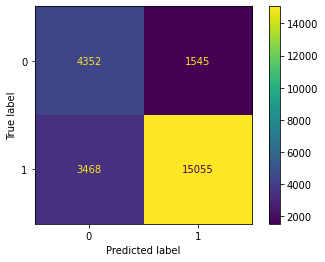

In [34]:
show_metrics(adult_train_df['income'].apply(lambda x: adult_dict[x]), catNB.predict(adult_train_df[adult_cat_col]).apply(lambda x: adult_dict[x]).to_list())

# Совмещение Баейсов

In [25]:
class MySemiNB:
    def __init__(self, alpha=1):
        self.gaus = MyGaussianNB()
        self.cat = MyCategoryNB()
        self.ap = []
        
    def fit(self, X, y):
        self.gaus.fit(X.select_dtypes(include=np.number), y)
        self.cat.fit(X.select_dtypes(include=object), y)
        self.ap = np.log(self.cat.ap[:])
        
    def predict(self, X):
        
        return self.likelihood(X).idxmax(axis=1)
    
    def predict_proba(self, X):
        # Применить функцию softmax (scipy.special.softmax) на выходы likelihood
        return softmax(self.likelihood(X), axis = -1)
    
    def likelihood(self, X):
        return self.gaus.likelihood(X.select_dtypes(include=np.number)) + self.cat.likelihood(X.select_dtypes(include=object)) - self.ap

In [26]:
msnb = MySemiNB()

In [27]:
msnb.fit(adult_train_df[adoult_target_mask], adult_train_df['income'] )

In [28]:
msnb.likelihood(adult_train_df[adoult_target_mask])

,>50K,<=50K
29,-49.700041,-54.584966
12181,-28.271460,-29.426327
18114,-35.052833,-32.578553
4278,-34.195667,-34.575340
12050,-39.289631,-30.415795
...,...,...
29802,-38.951484,-29.323403
5390,-28.457429,-29.812428
860,-36.755975,-48.510592
15795,-28.416502,-27.463212


In [29]:
msnb.predict(adult_test_df[adoult_target_mask])

14160    <=50K
27048    <=50K
28868    <=50K
5667     <=50K
7827     <=50K
         ...  
26658    <=50K
29401    <=50K
27265    <=50K
30339    <=50K
8610     <=50K
Length: 8141, dtype: object

In [30]:
msnb.predict_proba(adult_test_df[adoult_target_mask])

,>50K,<=50K
14160,0.041117,0.958883
27048,0.000011,0.999989
28868,0.075495,0.924505
5667,0.000326,0.999674
7827,0.000005,0.999995
...,...,...
26658,0.005006,0.994994
29401,0.000324,0.999676
27265,0.462157,0.537843
30339,0.000009,0.999991


In [31]:
accuracy_score(adult_train_df['income'], msnb.predict(adult_train_df[adoult_target_mask])), accuracy_score(adult_test_df['income'], msnb.predict(adult_test_df[adoult_target_mask]))

(0.8224406224406224, 0.8135364205871515)

In [33]:
adult_dict = { adult_train_df['income'].unique()[i] : i for i in range(len(adult_train_df['income'].unique()))}
adult_dict

{'>50K': 0, '<=50K': 1}

accuracy   82.2
precision  89.5
recall     86.7
f1         88.1
roc auc    77.4


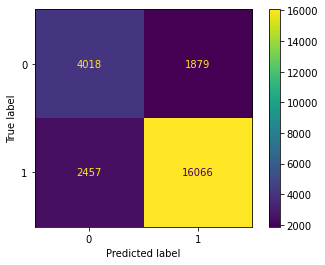

In [34]:
show_metrics(adult_train_df['income'].apply(lambda x: adult_dict[x]), msnb.predict(adult_train_df[adoult_target_mask]).apply(lambda x: adult_dict[x]).to_list())

# Roc Auc

In [35]:
def roc_auc(y, x):
    y = (y == x.columns[0])
    df = pd.DataFrame({"x" : x[x.columns[0]], "y" : y})
    points = [[0],[0]]
    df = df.sort_values("x")
    
    last_ind = 0
    for i in df["y"]:
        points[0] += [points[0][last_ind] + i]
        points[1] += [points[1][last_ind] + (not i)]
        last_ind += 1
    
            
    x_c = np.array(points[0])/points[0][last_ind]
    y_c = np.array(points[1])/points[1][last_ind]
    
    print("Integral", np.trapz(y_c, x_c))
    plt.plot(
        x_c,
        y_c
    )
    plt.show()


Integral 0.8625292272711275


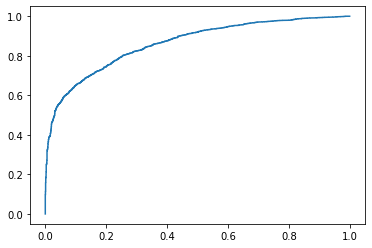

In [36]:
roc_auc(adult_test_df['income'], catNB.predict_proba(adult_test_df[adoult_target_mask]))

In [37]:
roc_auc_score(adult_test_df['income'], catNB.predict_proba(adult_test_df[adoult_target_mask])[">50K"])

0.8625056943788678

# Log Reg

In [228]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression

In [229]:
X_train = adult_train_df[adoult_target_mask].copy()
y_train = adult_train_df['income'].copy()

X_test = adult_test_df[adoult_target_mask].copy()
y_test = adult_test_df['income'].copy()

In [230]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)*2 - 1
y_test = le.transform(y_test)*2 - 1
y_test

array([-1, -1, -1, ...,  1, -1, -1])

In [231]:
oe = OrdinalEncoder()
X_train[adult_cat_col] = oe.fit_transform(X_train[adult_cat_col])
X_test[adult_cat_col] = oe.transform(X_test[adult_cat_col])
X_test[adult_cat_col]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
14160,4.0,15.0,2.0,6.0,0.0,4.0,1.0,39.0
27048,4.0,15.0,4.0,12.0,3.0,4.0,1.0,39.0
28868,4.0,15.0,2.0,13.0,5.0,4.0,0.0,39.0
5667,4.0,1.0,4.0,12.0,1.0,4.0,1.0,39.0
7827,4.0,15.0,4.0,1.0,3.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26658,4.0,7.0,4.0,3.0,1.0,4.0,1.0,39.0
29401,4.0,11.0,0.0,7.0,3.0,4.0,1.0,39.0
27265,4.0,15.0,2.0,12.0,0.0,4.0,1.0,39.0
30339,4.0,15.0,4.0,10.0,3.0,4.0,0.0,39.0


In [232]:
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
np.unique(y_train, return_counts=True)[1]

array([18523,  5897], dtype=int64)

In [233]:
np.unique(lr.predict(X_train), return_counts=True)#Где я затупил?

(array([-1]), array([24420], dtype=int64))

accuracy   75.9
precision  0.0
recall     0.0
f1         0.0
roc auc    50.0


C:\Users\sereg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


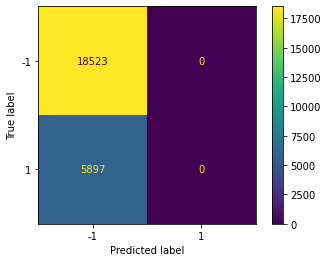

In [234]:
show_metrics(y_train, lr.predict(X_train))